### DATA 620 - Project 1
Author: Kory Martin  
Date: 2/18/2024

### 1. Introduction

#### Project Instructions

<ul>
<li>For your first project, you are asked to identify and load a network dataset that has some categorical information available for each node.
<li>For each of the nodes in the dataset, calculate degree centrality and eigenvector centrality.
<li>Compare your centrality measures across your categorical groups.
</ul>
    

#### Project Plan
I chose to use the a movieLens dataset [here](https://files.grouplens.org/datasets/movielens/ml-latest-small-README.html), where we see users and the ratings that they made for a number of movies. Using this data, I am going to build a network of Users that have rated at least 15 of the same movies. This type of analysis can be used to identify similar users - if we consider that the movies that a user watches would suggest a level of similarity.


For this analysis, we will focus on answering the following questions for a network:

<ul>
    <li> How many nodes are in the graph?
    <li> What is the diameter of the Graph?    
    <li> What is the size of the Graph?
    <li> What is the average number of neighbors for nodes? 
    <li> What is the largest number of neighbors that any particular node has?
    <li> What node(s) has the largest number of neighbors?
    <li> What is the fewest number of neighbors that any particular node has?
    <li> What node(s) has the fewest number of neighbors?
</ul>

### 2. Import Libraries

In [1]:
import networkx as net
from networkx import algorithms as algo
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
from statistics import mean


### 3. Data Preparation

We begin by importing the data for the specific movie titles that were being reviewed. Although this ultimately isn't something that will be included in the final network analysis, it was something that I had initially thought I wanted to specifically analyze. Additionally, the ratings data will be imported

In [3]:
movies_data = pd.read_csv('data/movies.csv')
ratings_data = pd.read_csv('data/ratings.csv')

In [12]:
movies_data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [53]:
movie_count = m1_simple.groupby('userId').count().reset_index()

In [54]:
movie_count['pct_watched'] = movie_count['title']/len(movie_titles)

In [73]:
movie_raters_subset = list(movie_count[movie_count['pct_watched'] <= .025]['userId'].unique())

In [70]:
503/len(movie_raters)

0.8245901639344262

In [106]:
m1_sub_titles = list(m1_simple[m1_simple['userId'].isin(movie_raters_subset)]['title'].unique())

In [24]:
movie_titles = list(movies_data['title'].unique())

In [39]:
movie_raters = list(ratings_data['userId'].unique())

Now that we have the movies and the ratings data imported, we will merge the two datasets so that we are able to track exactly which movie titles a specific user rated.

In [19]:
m1 = pd.merge(ratings_data, movies_data, how='left',
        left_on='movieId', right_on='movieId')

Finally, we will then create a more simplified version of our merged dataframe that will only include the data for the user, the movie title and the rating that they gave to that movie

In [20]:
m1_simple = m1.loc[:,['title','userId','rating']]

In [102]:
movie_pairs = []
for user in movie_raters_subset:
    
    m1_sub = m1_simple.loc[m1_simple['userId'] == user]
    movie_titles = list(m1_sub['title'].unique())
    for i in range(len(movie_titles)):

        movie1 = m1_sub.iloc[i]['title']
        j = i+1
        while j < len(movie_titles):
            movie2 = m1_sub.iloc[j]['title']
            j+=1
            movie_pair = (movie1, movie2)
            movie_pairs.append(movie_pair)


In [87]:
m1_simple[m1_simple['userId'] == user]
m1_sub = m1_simple.loc[m1_simple['userId'] == user]
movie_titles = list(m1_simple[m1_simple['userId'] == user]['title'].unique())


'GoldenEye (1995)'

In [97]:
movie_titles

['Toy Story (1995)',
 'GoldenEye (1995)',
 'Braveheart (1995)',
 'Anne Frank Remembered (1995)',
 'Man of the Year (1995)',
 'Apollo 13 (1995)',
 'Crimson Tide (1995)',
 'Net, The (1995)',
 'Waterworld (1995)',
 'Dumb & Dumber (Dumb and Dumber) (1994)',
 'Interview with the Vampire: The Vampire Chronicles (1994)',
 'Natural Born Killers (1994)',
 'Outbreak (1995)',
 'Pulp Fiction (1994)',
 'Shawshank Redemption, The (1994)',
 'Star Trek: Generations (1994)',
 'While You Were Sleeping (1995)',
 'Forrest Gump (1994)',
 'Cliffhanger (1993)',
 'Firm, The (1993)',
 'Fugitive, The (1993)',
 'Jurassic Park (1993)',
 'Terminator 2: Judgment Day (1991)',
 'Dances with Wolves (1990)',
 'Batman (1989)',
 'Jane Eyre (1996)',
 'Moll Flanders (1996)',
 "Heaven's Prisoners (1996)",
 'Thinner (1996)',
 'Eraser (1996)',
 'Adventures of Pinocchio, The (1996)',
 'High School High (1996)',
 'Twelfth Night (1996)',
 'Jude (1996)',
 "William Shakespeare's Romeo + Juliet (1996)",
 'Return of Martin Guerre, T

In [100]:
movie_pairs = []
for i in range(len(movie_titles)):
    
    movie1 = m1_sub.iloc[i]['title']
    j = i+1
    while j < len(movie_titles):
        movie2 = m1_sub.iloc[j]['title']
        j+=1
        movie_pair = (movie1, movie2)
        movie_pairs.append(movie_pair)

In [111]:
movie_pairs_df = pd.DataFrame(movie_pairs)

In [113]:
movie_pairs_df = movie_pairs_df.rename(columns={0:'movie1',1:'movie2'})

In [117]:
movie_pairs_list = list(set(movie_pairs))

In [104]:
len(movie_pairs)

2232623

In [35]:
len(movie_titles)

9737

Prior to creating an evaluating our network and identifying the connection of users, we will create a list of the unique users that are in our dataset

In [189]:

movie_raters = list(m1_simple['userId'].unique())

Now that we have our list of users with reviews, we will look to identify the relationships amongst users that have rated the same movies. We will use the entire list of users with a rating for this dataset and will only look for relationships between users that have reviewed a minimum of 15 of the same movies

In [438]:


#num_users =200
movie_threshold = 15

#random_users = random.sample(movie_raters, k=num_users)

user_edges = []
#processed_titles = []
#num_edges = []
for user1 in movie_raters:
    user1_movies = set(list(m1_simple[m1_simple['userId'] == user1]['title'].unique()))
    
    for user2 in random_users:
        if user1!=user2:
            
            user2_movies = set(list(m1_simple[m1_simple['userId'] == user2]['title'].unique()))
        
            combined_movies = user1_movies.intersection(user2_movies)
            num_combined = len(combined_movies)
        
        
        
            if num_combined >= movie_threshold:
                
                edge_tuple = (user1, user2)
                user_edges.append(edge_tuple)
                    

In [439]:
pd.DataFrame(user_edges).to_csv('data/user_edges.csv')

In [440]:
unique_users = list(pd.DataFrame(user_edges)[0].unique())

### 3. Analysis of Network

Now that we have the relationship data established, we will display the network of individuals and from there we can examine different measurements related to this network. 

Some of the questions we will look to examine are:

<ul>
    <li> How many nodes are in the graph?
    <li> What is the diameter of the Graph?    
    <li> What is the size of the Graph?
    <li> What is the average number of neighbors for nodes? 
    <li> What is the largest number of neighbors that any particular node has?
    <li> What node(s) has the largest number of neighbors?
    <li> What is the fewest number of neighbors that any particular node has?
    <li> What node(s) has the fewest number of neighbors?
</ul>

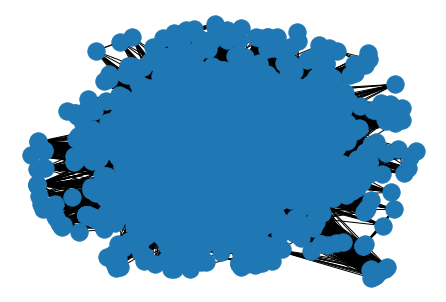

In [119]:
G = net.Graph()
G.add_nodes_from(m1_sub_titles)
G.add_edges_from(movie_pairs_list)
#net.draw(G,with_labels=True, font_size = 6, node_size=300)
net.draw(G, font_size = 6, node_size=300)

<b> a. How many nodes are included in the network?

In [120]:
len(list(G.nodes()))

4894

In [450]:
len(list(m1_simple['userId'].unique()))

610

There are 600 nodes in this network - meaning that of our 610 users with ratings. This represents, 98% of the users in the network

<b> b. What is the diameter of the Graph?

The diameter of the graph is 3

<b> c. What is the size of the Graph?

In [124]:
G.size()

1145704

There are a total of 28,425 connections amongst the users in this network

<b>d.  What is the average and median number of neighbors for nodes?

In [139]:
num_neighbors = [len(list(net.neighbors(G,user))) for user in list(G.nodes())]
numbers_group = [{'title':user, 'num_neighbors':len(list(net.neighbors(G,user)))} for user in list(G.nodes())]
mean_neighbors = mean(num_neighbors)
median_neighbors = np.median(num_neighbors)

In [126]:
print("Mean # of Neighbors per User: ", mean_neighbors)
print("Median # of Neighbors per User: ", median_neighbors)

Mean # of Neighbors per User:  468.20760114425826
Median # of Neighbors per User:  262.5


In our network, users had an average of 94.75 neighbors - or users that they were connected to who watched and rated 15 or more of the same movies. This number is much higher than the median of 60. This suggests that there are number of users who have watched so many movies that they had a larger number of users who watched and rated at least 20 of the same movies.

<b>e. What is the largest number of neighbors that any particular node has?

In [127]:
max_neighbors = max(num_neighbors)
max_neighbors

3426

The largest number of neighbors that any particular node has is 595 which represents

<b>f. What node(s) has the largest number of neighbors?


In [128]:
nodes_with_max = [user for user in list(G.nodes()) if len(list(net.neighbors(G,user))) == max_neighbors]
nodes_with_max

['Matrix, The (1999)']

User 414 is the only user with the maximum number of neighbors in the network

<b>g. What is the fewest number of neighbors that any particular node has?

In [129]:
min_neighbors = min(num_neighbors)
min_neighbors

19

<b>h. What node(s) has the fewest number of neighbors?

In [130]:
nodes_with_min = [user for user in list(G.nodes()) if len(list(net.neighbors(G,user))) == min_neighbors]
nodes_with_min

['Spies Like Us (1985)', 'District 13 (Banlieue 13) (2004)']

In [131]:
len(nodes_with_min)

2

There were 14 users in our network who only had 1 other user that watched at least the same 20 movies as them.

In [141]:
neighbors_df = pd.DataFrame(numbers_group)

In [150]:
movies_data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [148]:
neighbors_df.head()

,title,num_neighbors
0,Toy Story (1995),2910
1,Grumpier Old Men (1995),1098
2,Heat (1995),1731
3,Seven (a.k.a. Se7en) (1995),2397
4,"Usual Suspects, The (1995)",2604


In [155]:
pd.merge(neighbors_df, movies_data.loc[:,['genres','title']], how='left')

,title,num_neighbors,genres
0,Toy Story (1995),2910,Adventure|Animation|Children|Comedy|Fantasy
1,Grumpier Old Men (1995),1098,Comedy|Romance
2,Heat (1995),1731,Action|Crime|Thriller
3,Seven (a.k.a. Se7en) (1995),2397,Mystery|Thriller
4,"Usual Suspects, The (1995)",2604,Crime|Mystery|Thriller
...,...,...,...
4893,Creepshow 2 (1987),186,Horror
4894,"Fabulous Baker Boys, The (1989)",186,Drama|Romance
4895,Man of the Year (1995),36,Documentary
4896,Heaven's Prisoners (1996),36,Crime|Thriller


In [146]:
neighbors_df.sort_values(by='num_neighbors', ascending=False).tail(10)

,title,num_neighbors
4229,Samsara (2011),20
4833,"Host, The (2013)",20
4834,"Lifeguard, The (2013)",20
4835,"One I Love, The (2014)",20
4836,Laggies (2014),20
4837,Delirium (2014),20
4838,Insurgent (2015),20
3290,Come See the Paradise (1990),20
3696,District 13 (Banlieue 13) (2004),19
3695,Spies Like Us (1985),19


### 4. Conclusion

This analysis was helpful in driving some conclusions regarding a specific construction of the network of users who rated movies. One thing that I gained from this process is that network graphs are a way for us to evaluate different relationships amongst different things, but at the same time - as with other types of analysis problems - the real insights are gleaned from the particular questions that we ask of the data and the specific analyses that we apply to the data. Networks are particularly helpful for evaluating relationships and provide a data structure that is best suited for this type of analysis.